In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
happiness = pd.read_csv('/content/gdrive/MyDrive/Diplomado Data Science/Visualización de Datos con Python/Happiness_report.csv')
happiness

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [12]:
mexico = happiness.loc[happiness['Country or region']=='Mexico']
mexico.set_index('Country or region', inplace=True)
mexico

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


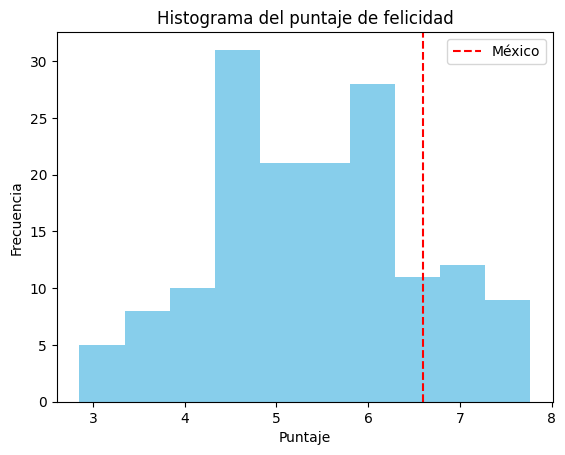

In [32]:
rango = mexico['Score'].mode()[0]
plt.hist(happiness['Score'],bins=10,color='skyblue')
plt.axvline(x=rango, color='red', linestyle='--', label='México')
plt.xlabel('Puntaje')
plt.ylabel('Frecuencia')
plt.title('Histograma del puntaje de felicidad')
plt.legend()

Text(0.5, 1.0, 'Boxplot de la esperanza de vida saludable')

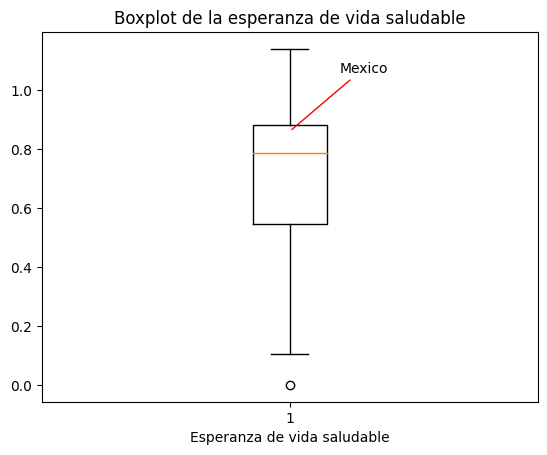

In [48]:
plt.boxplot(happiness['Healthy life expectancy'])
plt.annotate('Mexico',xy=(1, mexico['Healthy life expectancy']), xytext=(1.1, mexico['Healthy life expectancy']+0.2),arrowprops=dict(arrowstyle='-',color='red'))
plt.xlabel('Esperanza de vida saludable')
plt.title('Boxplot de la esperanza de vida saludable')

Text(0.5, 1.0, 'Contribución de los factores a la felicidad en México')

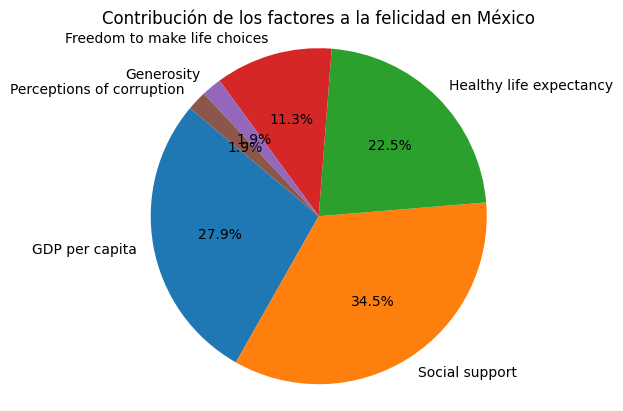

In [55]:
factores = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
promedio = [mexico[factor].mean() for factor in factores]

plt.pie(promedio, labels=factores, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.axis('equal')
plt.title('Contribución de los factores a la felicidad en México')

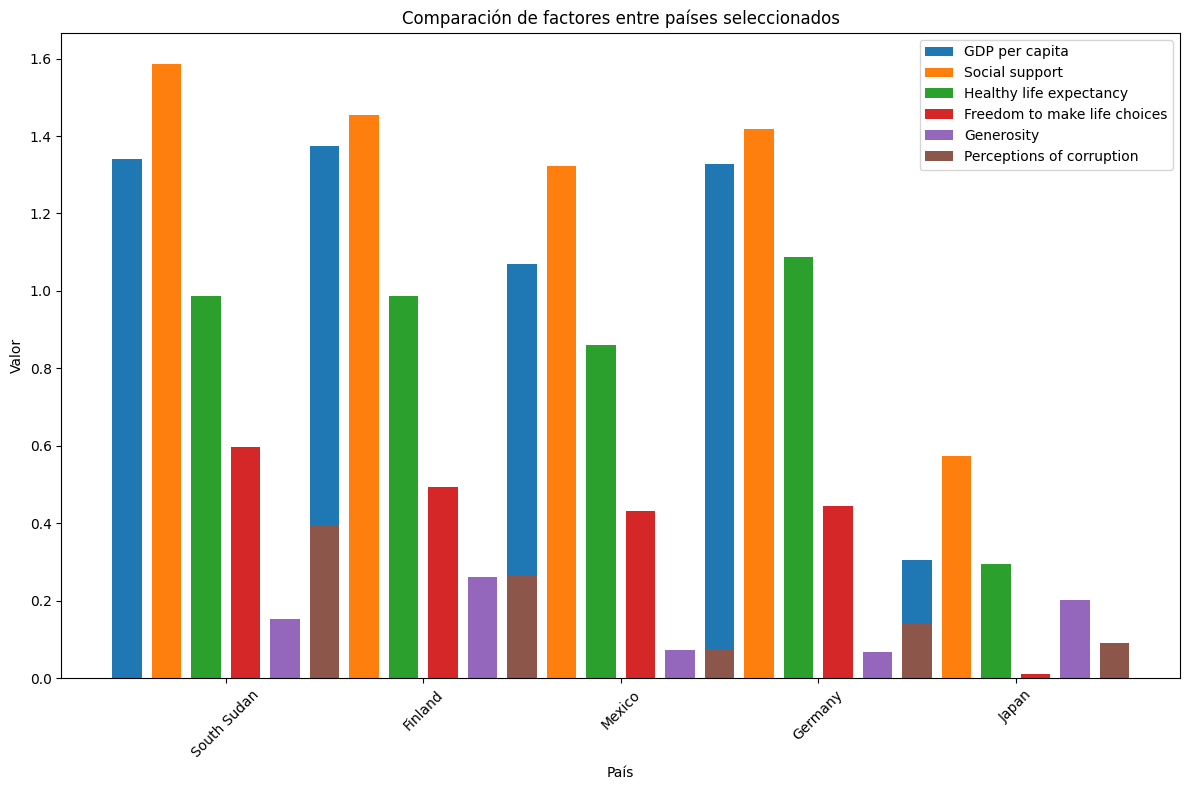

In [66]:
mas_feliz = happiness.loc[happiness['Score'].idxmax()]['Country or region']
menos_feliz = happiness.loc[happiness['Score'].idxmin()]['Country or region']

paises_seleccionados = [menos_feliz, mas_feliz, 'Mexico', 'Germany', 'Japan']
df_seleccionados = happiness[happiness['Country or region'].isin(paises_seleccionados)]

fig, ax = plt.subplots(figsize=(12, 8))

factores = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
num_factores = len(factores)
ancho_barra = 0.15
espacio_entre_barras = 0.05
indices_paises = np.arange(len(paises_seleccionados))

for i, factor in enumerate(factores):
    valores_factor = df_seleccionados[factor]
    ax.bar(indices_paises + (i * (ancho_barra + espacio_entre_barras)), valores_factor, width=ancho_barra, label=factor)

ax.set_title('Comparación de factores entre países seleccionados')
ax.set_xlabel('País')
ax.set_ylabel('Valor')
ax.set_xticks(indices_paises + ((num_factores - 1) / 2) * (ancho_barra + espacio_entre_barras))
ax.set_xticklabels(paises_seleccionados)
ax.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

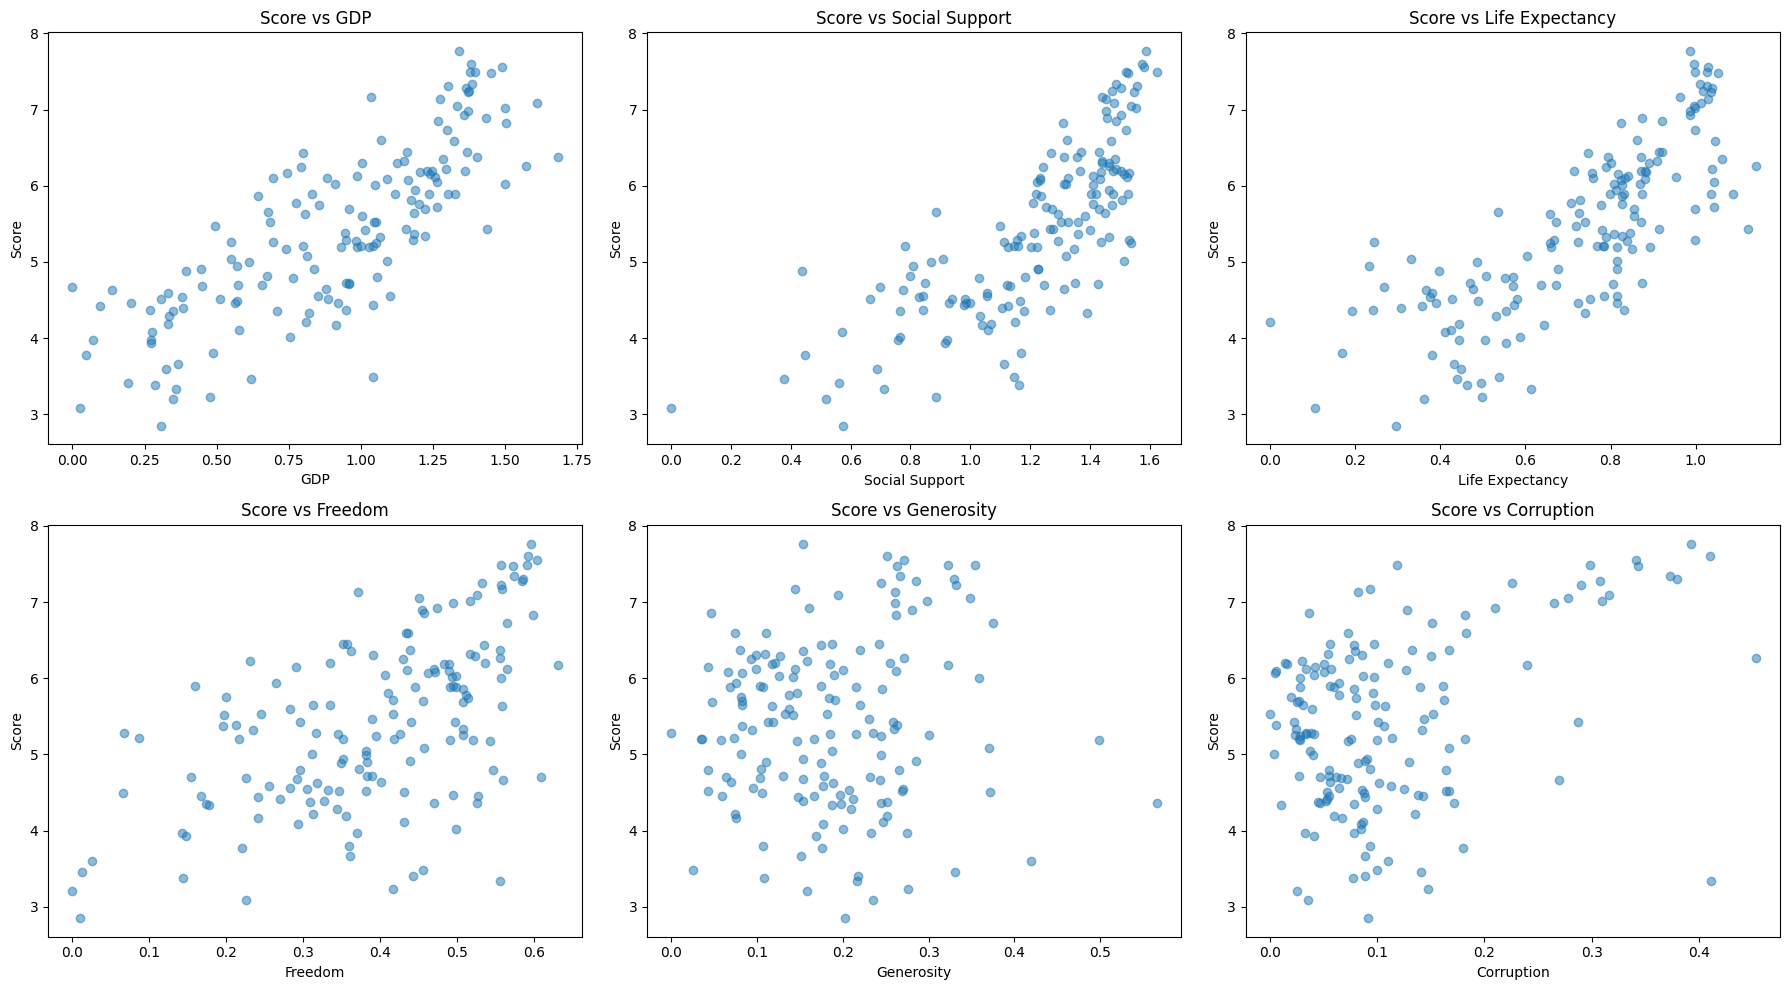

In [62]:
factores = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
etiquetas = ['GDP', 'Social Support', 'Life Expectancy', 'Freedom', 'Generosity', 'Corruption']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, factor in enumerate(factores):
    fila = i // 3
    columna = i % 3
    ax = axes[fila, columna]

    ax.scatter(happiness[factor], happiness['Score'], alpha=0.5)

    ax.set_xlabel(etiquetas[i])
    ax.set_ylabel('Score')
    ax.set_title(f'Score vs {etiquetas[i]}')

plt.tight_layout()
plt.show()

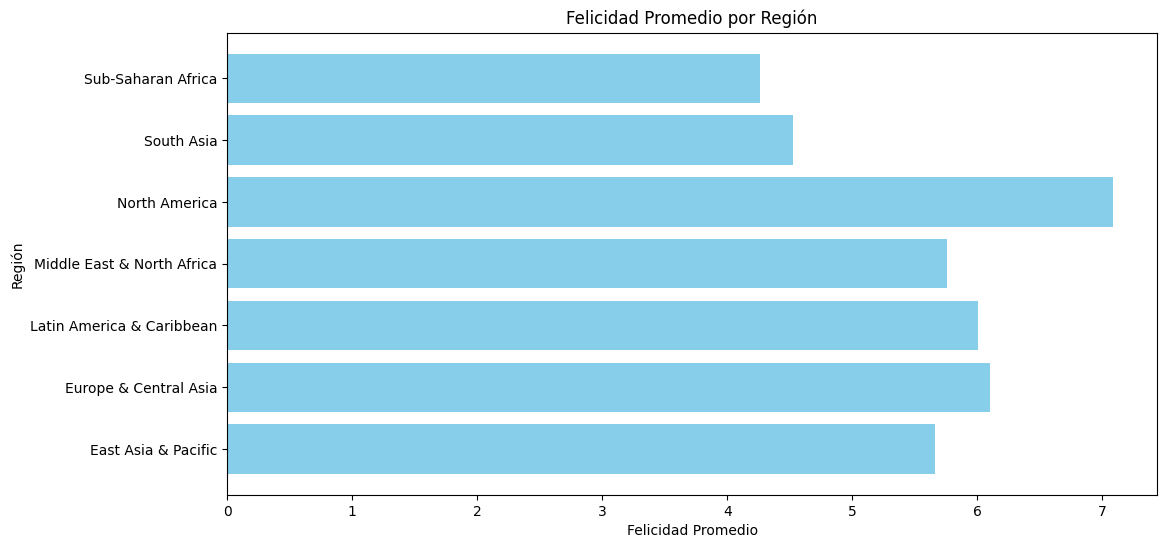

In [69]:
metadata = pd.read_csv('/content/gdrive/MyDrive/Diplomado Data Science/Visualización de Datos con Python/Metadata.csv')

merged_df = pd.merge(happiness, metadata, left_on='Country or region', right_on='TableName')

felicidad_promedio_por_region = merged_df.groupby('Region')['Score'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.barh(felicidad_promedio_por_region['Region'], felicidad_promedio_por_region['Score'], color='skyblue')
plt.xlabel('Felicidad Promedio')
plt.ylabel('Región')
plt.title('Felicidad Promedio por Región')
plt.show()
